In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 14 09:23:56 2022

@author: Yaniv Eliezer
@maintenance by Liam Shaughnessy
@modified by Kyungduk Kim
@updated by Fei Xia
"""

In [ ]:
# Importing required libraries
from os.path import dirname, join as pjoin
import scipy.io as sio
import h5py
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Setting up the device for PyTorch (GPU if available, else CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

set data file

In [ ]:
# Define the data folder path (update the placeholder with the actual path)
datafolder = '/...';

Data file name, in our case, we used h5/hdf5 to save our large dataset

In [ ]:
# Define the filename for the parameters (update the placeholder with the actual filename)
filename = parameters_dir = pjoin(datafolder, '...h5')

In [ ]:
# Define the name and path of the original .h5 file (update the placeholders with actual values)
fileName = "data"
filePath = "h:\\frames\\ControlEnhA\\KKsRoom\\"
# Define the total number of speckle patterns in the .h5 file
SetSize = 70000 # Number of input-output pairs
# Define the correlation criterion
filterCorr = 0.96 # Filter the data below which this correlation
# Define the iteration_modN
iteration_modN = 7*60 # Period (# of patterns) to check correlation to see setup stability

# Importing required libraries
import h5py
import matplotlib.pyplot as plt
import numpy as np
import math

# Define a function to convert values to integers
def g(x):
    return int(x)
intx = np.vectorize(g)

# Open the .h5 file and read data
with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    key0 = list(f.keys())[0] # cfgIndex
    key1 = list(f.keys())[1] # corVec
    key2 = list(f.keys())[2] # maxSetSize
    key3 = list(f.keys())[3] # nmpsx
    key4 = list(f.keys())[4] # nmpsy
    key5 = list(f.keys())[5] # savedCfgInd
    key6 = list(f.keys())[6] # savedDigits
    key7 = list(f.keys())[7] # savedFrames

    cfgIndex = f[key0]
    corVec = f[key1][:]

ind = np.arange(0, math.ceil(SetSize/iteration_modN)*iteration_modN)
corVecRep = np.repeat(corVec, iteration_modN)

Keys: <KeysViewHDF5 ['cfgIndex', 'corVec', 'maxSetSize', 'nmpsx', 'nmpsy', 'savedCfgInd', 'savedDigits', 'savedFrames']>


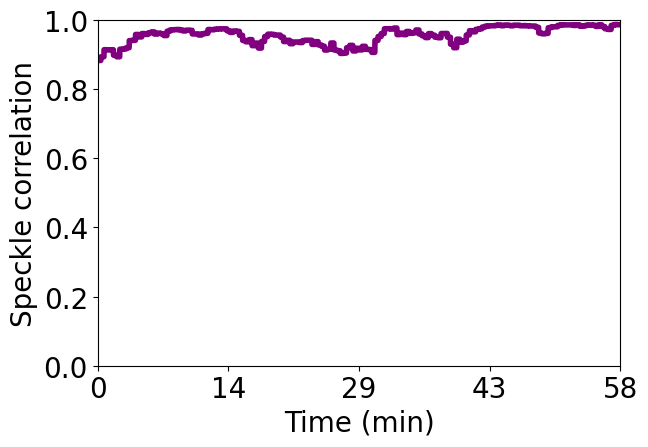

In [ ]:
corVecRep1 = corVecRep[0:69700]
x_range = range(len(corVecRep1))
x_ticks = np.linspace(0, len(corVecRep1) - 1, 5, dtype=int)
plt.figure(figsize=(7, 5))

plt.plot(x_range, corVecRep1, color='purple',linewidth=4)
plt.ylabel('Speckle correlation', fontsize=N)
plt.xlabel('Time (min)', fontsize=N)
plt.ylim([0, 1])
plt.xlim([0, 102])
plt.xticks(x_ticks, [int(tick * 0.05 / 60) for tick in x_ticks], fontsize=N)
plt.yticks(fontsize=N)
plt.tight_layout()

plt.savefig('image_speckle_correlation.svg', dpi=600, format='svg')
plt.show()